# Homework 1

**Name:** -- Diana Zepeda Tatengo --

**e-mail:** -- diana.zepeda6085@alumnos.udg.mx --

# MODULES

In [387]:
import numpy as np
import matplotlib.pyplot as plt

# Theory on the Gradient Descent algorithm
Gradient descent is an optimization algorithm is used to find the minimun of a function using the negative gradient by iteratively moving in the direction of the steepest descent.
It updates parameters using the rule:
$$
w_{t+1} = w_t - n_t * ∇f(w_t)
$$
where $w_{t+1}$ represents the parameters, $n_t$ is the learning rate, and $∇f(w_t)$ is the gradient of the cost function. 
The process continues until convergence, which is determined by a stopping criterion such as a small gradient magnitude or a predefined number of iterations.
## What is the learning rate?
The learning rate $n$ is the size of the steps that are taken to reach the minimum. 
* A **high** learning rate may cause the algorithm to overshoot the minimum, leading to **divergence**.
* A **low** learning rate improves precision but may result in slow **convergence**, requiring more iterations and potentially reducing efficiency..

## Function to be optimized
I choose the **Himmelblau's function**, which is defined as:
$$
f(x,y) = (x^2+y-11)^2 + (x+y^2-7)^2
$$
It has four local minima where the function evaluates to zero
* $f(3.0,2.0) = 0.0,$
* $f(-2.805118,3.131312) = 0.0,$
* $f(-3.779310,-3.283186) = 0.0,$
* $f(3.584428,-1.84) = 0.0$

In [391]:
# Function to be optimized
# Himmelblau's function
def f_himmelblaus(x, y):
    return (x**2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2 
    
# Derivatives
def dfdx(x, y):
    return 4*x*(x**2 + y - 11) + 2*(x + y**2 - 7)

def dfdy(x, y):
    return 4*y*(y**2 + x - 7) + 2*(y + x**2 - 11)

In [403]:
#Initial Parameters
learning_rate = 0.01
iterations = 100

# Inicial Points
x_point = np.random.randint(-6, 6) # Random number between -6 and 6
y_point = np.random.randint(-6, 6)
z_point = f_himmelblaus(x_point, y_point)

# Gradient descent algorithm
## Initialize the lists
x_points, y_points, z_points = [x_point], [y_point], [z_point]
# Going on every iteration
for _ in range(iterations):  
    # Get the gradient
    gradient_x = dfdx(x_point,y_point)
    gradient_y = dfdy(x_point,y_point)
    
    # Update points
    x_point = x_point - learning_rate * gradient_x        
    y_point = y_point - learning_rate * gradient_y    

    #Save iterations
    x_points.append(x_point)
    y_points.append(y_point)
    z_points.append(f_himmelblaus(x_point, y_point))

## RESULTS

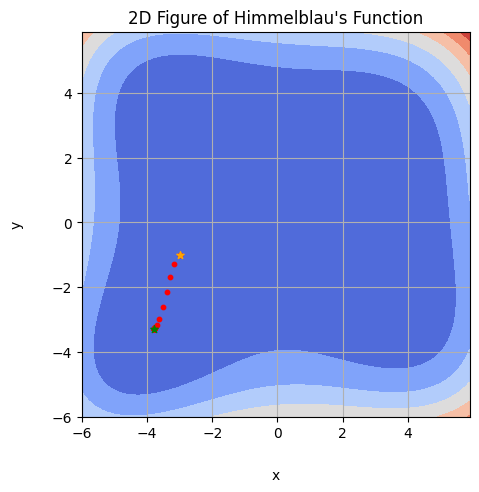

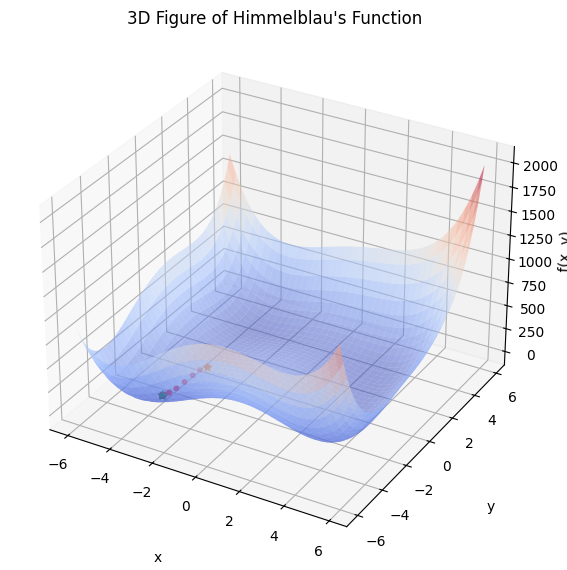

Initial Points: x = -3, y = -1, f(x, y) = 90
Local Minimum: x = -3.77931, y = -3.283186, f(x, y) = 7.888609052210118e-31


In [406]:
# Generate a range of values for the x and y from -6 to 6, with a step of 0.1
x_range = np.arange(-6, 6, 0.1)
y_range = np.arange(-6, 6, 0.1)

# Create meshgrid of coordinates (X, Y) to evaluate the function in 2D or 3D
X, Y = np.meshgrid(x_range, y_range)
Z = f_himmelblaus(X, Y)

#2D Figure
fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1)
ax.grid()
ax.contourf(X, Y, Z, cmap='coolwarm')

# Set Title
plt.title(f"2D Figure of Himmelblau's Function")

#3D Figure
fig = plt.figure(figsize = (15,15))
ax2 = fig.add_subplot(1,2,2, projection = '3d')
ax2.grid()
ax2.plot_surface(X,Y,Z, cmap='coolwarm', alpha=0.5)

# Set Title
plt.title(f"3D Figure of Himmelblau's Function")

# Set Labels
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)

ax2.set_xlabel('x', labelpad=20)
ax2.set_ylabel('y', labelpad=20)
ax2.set_zlabel('f(x, y)')

# Set Iterations
ax.scatter(x_points, y_points, marker='o', color='red',s=10)
ax2.scatter(x_points, y_points, z_points, marker='o', color='red',s=10)

# Set Initial Points with an orange '*' marker
ax.scatter(x_points[0],y_points[0], c='orange', marker='*', s=30)
ax2.scatter(x_points[0],y_points[0],z_points[0], c='orange', marker='*', s=40)

# Set Final Points with a green '*' marker
ax.scatter(x_points[-1],y_points[-1], c='g', marker='*', s=30)
ax2.scatter(x_points[-1],y_points[-1],z_points[-1], c='g', marker='*', s=40)

plt.show()

# Print the Initial Points and the Calculated Local Minimum
print(f"Initial Points: x = {x_points[0]}, y = {y_points[0]}, f(x, y) = {z_points[0]}")
print(f"Local Minimum: x = {round(x_points[-1],6)}, y = {round(y_points[-1],6)}, f(x, y) = {z_points[-1]}")